In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import envsensor

In [3]:
import numpy as np

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
import datetime
import json
import time

In [8]:
from envsensor import foo,loopsensors

In [9]:
from envsensor import database

In [10]:
from envsensor import psData

In [11]:
from envsensor import Ping

In [83]:
pingMonitor=Ping.Ping('www.epfl.ch',name='epfl')

In [13]:
pcTemp=psData.Temperature()

In [14]:
pcMemory=psData.Memory()

In [15]:
process=psData.Process('python3')

In [16]:
diskMonitor=psData.DiskUsage('/',name='root')

In [84]:
instrs=loopsensors.loopsensors(threaded=False)
instrs.addSensor(pingMonitor)
instrs.addSensor(pcTemp)
instrs.addSensor(pcMemory)
instrs.addSensor(diskMonitor)
instrs.addSensor(process)

In [63]:
pingMonitorWrong=Ping.Ping('192.168.1.47',name="wrongPing")
instrs.addSensor(pingMonitorWrong)

In [64]:
pingMonitorWrong2=Ping.Ping('192.168.1.48',name="wrongPing2")
instrs.addSensor(pingMonitorWrong2)

In [65]:
%timeit instrs.getMeasure()

6.2 s ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
mes={}
instrs.appendMeasure(mes)
mes

{'loopsensors': {'root': {'used': 13232701440, 'free': 42538848256},
  'www.epfl.ch': {'respond': True},
  'Memory': {'memory': {'used': 5184262144,
    'free': 640372736,
    'percent': 69.1},
   'swap': {'used': 1265664, 'free': 8202788864, 'percent': 0.0}},
  'wrongPing': {'respond': False},
  'Temperature': {'coretemp': [38.0, 38.0, 32.0, 35.0, 36.0],
   'radeon': [39.0]},
  'Process': {'python3': [1866, 21930, 21933, 21934, 22639, 24829, 25536]}}}

In [66]:
mes2={}
instrs.appendMeasure(mes2)

In [84]:
lenTab=len(tabData)
tabDict={}
for i in range(lenTab):
    for data in tabData[i].items():
        try:
            tabDict[data[0]][i]=data[1]
        except KeyError as e:
            if type(data[1])==float:
                tabDict[data[0]]=np.full(lenTab, np.nan)
            else:
                tabDict[data[0]]=np.full(lenTab, np.object)
            tabDict[data[0]][i]=data[1]

In [85]:
def NumpyEncoder(obj):
    if type(obj).__module__ == np.__name__:
        if isinstance(obj, np.ndarray):
            return obj.tolist() 
        else:
            return obj.item()
    elif isinstance(obj, datetime.datetime):
        return obj.isoformat()
    raise TypeError('Unknown type:', type(obj))

json.dumps(tabDict, default=NumpyEncoder)

'{"d": ["2019-12-10T15:28:59.607000", "2019-12-10T15:29:13.856000", "2019-12-10T15:29:14.868000", "2019-12-10T15:29:15.881000", "2019-12-10T15:29:16.894000", "2019-12-10T15:29:17.906000", "2019-12-10T15:29:18.919000", "2019-12-10T15:29:19.932000", "2019-12-10T15:29:20.944000", "2019-12-10T15:29:21.957000", "2019-12-10T15:29:22.969000", "2019-12-10T15:29:23.982000", "2019-12-10T15:29:24.995000", "2019-12-10T15:29:26.007000", "2019-12-10T15:29:27.020000", "2019-12-10T15:29:45.438000", "2019-12-10T15:29:46.451000", "2019-12-10T15:29:47.464000", "2019-12-10T15:29:48.476000", "2019-12-10T15:29:49.489000", "2019-12-10T15:29:50.501000", "2019-12-10T15:29:51.514000", "2019-12-10T15:29:52.527000", "2019-12-10T15:29:53.539000", "2019-12-10T15:29:54.552000", "2019-12-10T15:29:55.564000", "2019-12-10T15:29:56.577000", "2019-12-10T15:29:57.590000", "2019-12-10T15:29:58.602000", "2019-12-10T15:29:59.615000", "2019-12-10T15:30:00.627000", "2019-12-10T15:30:01.640000", "2019-12-10T15:30:02.652000", "2

In [86]:
import matplotlib
from datetime import datetime
import pandas as pd

In [87]:
from matplotlib import pyplot as plt

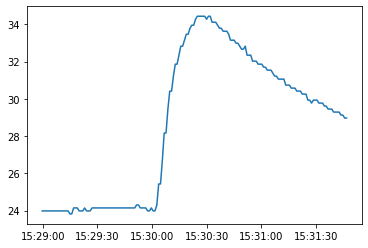

In [88]:
plt.plot(tabDict['d'],tabDict["data.temp_PC_cover"])

In [65]:
pdData=pd.DataFrame.from_dict(tabData).set_index('d')

In [67]:
pdData.plot()

In [4]:
from envsensor import fileLogger

In [5]:
logger=fileLogger.fileLogger('/tmp/logger/','testPC')

In [7]:
logger.insert({'test':34})

In [79]:
from envsensor import database

In [81]:
db=database.mongoDB()

In [66]:
from envsensor import xpol_rcb

In [67]:
xpol=xpol_rcb.xpol_rcb(host="192.168.1.10")

In [75]:
xpol.measure()

{'temp_RF': 23.656260057933697,
 'temp_plate': 20.75957515288059,
 'temp_pod_air': 24.943675571290633,
 'temp_PC_cover': 25.10460251046025}

In [71]:
while True:
    mes=xpol.measure()
    print(mes)
    db.insert(mes)
    time.sleep(1)

OSError: [Errno 113] No route to host

In [3]:
from envsensor import waterCounter

In [18]:
cnt1=waterCounter.WaterCounter('/dev/ttyUSB1',1)

In [8]:
cnt2=waterCounter.WaterCounter('/dev/ttyUSB1',2)

In [17]:
cnt1.measure()

{'value': 0.124}

In [29]:
%time cnt2.measure()

CPU times: user 0 ns, sys: 3.93 ms, total: 3.93 ms
Wall time: 287 ms


{'value': 39.522}

In [85]:
instrs.addSensor(xpol)

In [86]:
while True:
    mes=instrs.measure()
    print(mes)
    db.insert(mes)
    time.sleep(1)

{'epfl': {'respond': True}, 'Temperature': {'coretemp': [39.0, 40.0, 34.0, 37.0, 36.0], 'radeon': [41.0]}, 'Memory': {'memory': {'used': 4420595712, 'free': 1419427840, 'percent': 59.9}, 'swap': {'used': 1789952, 'free': 8202264576, 'percent': 0.0}}, 'root': {'used': 13232816128, 'free': 42538733568}, 'Process': {'python3': [1866, 21930, 21933, 21934, 22639, 24829, 25536]}, 'xpol_rcb': {'temp_RF': 23.817186997103313, 'temp_plate': 21.081429031219823, 'temp_pod_air': 25.265529449629867, 'temp_PC_cover': 25.265529449629867}}
{'epfl': {'respond': True}, 'Temperature': {'coretemp': [36.0, 36.0, 31.0, 33.0, 36.0], 'radeon': [40.5]}, 'Memory': {'memory': {'used': 4419854336, 'free': 1419948032, 'percent': 59.9}, 'swap': {'used': 1789952, 'free': 8202264576, 'percent': 0.0}}, 'root': {'used': 13232816128, 'free': 42538733568}, 'Process': {'python3': [1866, 21930, 21933, 21934, 22639, 24829, 25536]}, 'xpol_rcb': {'temp_RF': 23.656260057933697, 'temp_plate': 21.242355970389443, 'temp_pod_air': 

KeyboardInterrupt: 